In [53]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [46]:
df = pd.read_csv('/home/codr/Documents/Result_164.csv')
df.head()

,date_rounded,devices
0,2020-08-02 20:07:00.000000,1
1,2020-08-02 20:07:30.000000,1
2,2020-08-02 20:08:00.000000,4
3,2020-08-02 20:08:30.000000,1
4,2020-08-02 20:09:00.000000,2


In [47]:
df['date_rounded'] = pd.DatetimeIndex(df['date_rounded'])

In [48]:
df.head()

,date_rounded,devices
0,2020-08-02 20:07:00,1
1,2020-08-02 20:07:30,1
2,2020-08-02 20:08:00,4
3,2020-08-02 20:08:30,1
4,2020-08-02 20:09:00,2


In [75]:
df = df.rename(columns={'date_rounded': 'ds', 'devices': 'y'})


In [76]:
df.tail()

,ds,y
24808,2020-08-12 20:13:30,3
24809,2020-08-12 20:14:00,4
24810,2020-08-12 20:14:30,1
24811,2020-08-12 20:15:00,3
24812,2020-08-12 20:15:30,1


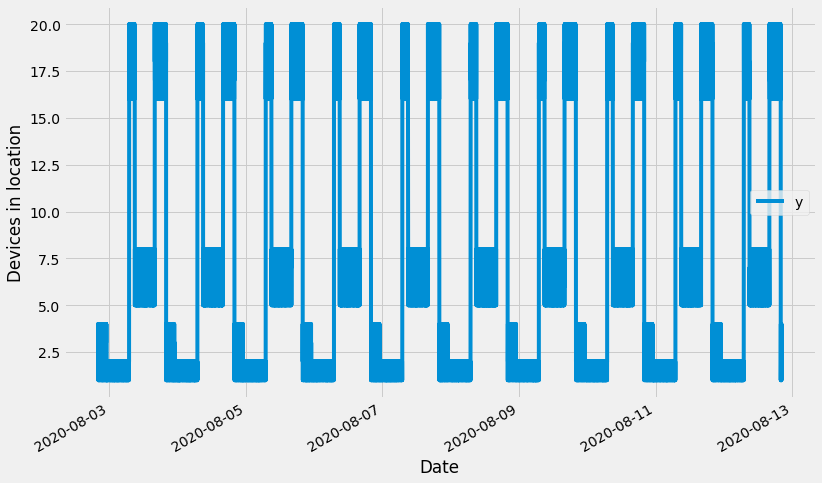

In [56]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Devices in location')
ax.set_xlabel('Date')

plt.show()

In [57]:
my_model = Prophet(interval_width=0.95)
my_model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [90]:
future_dates = my_model.make_future_dataframe(periods=4000, freq='min', include_history=True)
future_dates.tail()

,ds
28808,2020-08-15 14:51:30
28809,2020-08-15 14:52:30
28810,2020-08-15 14:53:30
28811,2020-08-15 14:54:30
28812,2020-08-15 14:55:30


In [91]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
28808,2020-08-15 14:51:30,8.127565,1.013968,14.449058
28809,2020-08-15 14:52:30,8.173390,1.859543,14.819018
28810,2020-08-15 14:53:30,8.219665,1.030183,14.279230
28811,2020-08-15 14:54:30,8.266391,1.271583,14.512476
28812,2020-08-15 14:55:30,8.313569,1.614230,14.624102


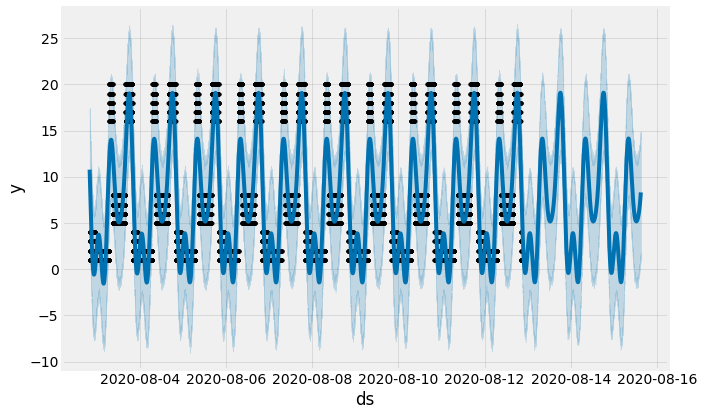

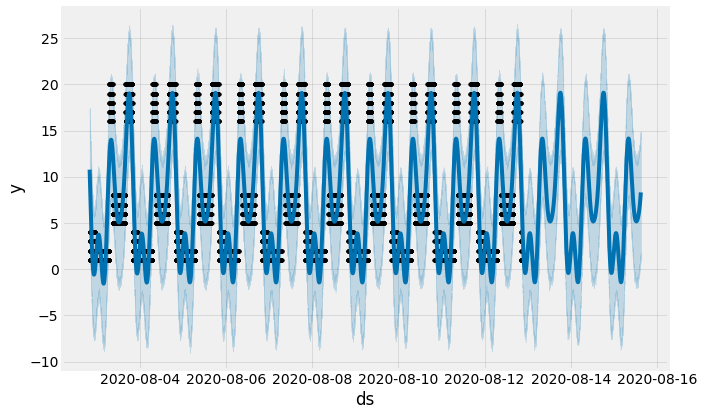

In [92]:
my_model.plot(forecast)